<a href="https://colab.research.google.com/github/rroxy08/CE888/blob/master/Lab7/exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/5





48000/48000 [==============================] - 45s 932us/step - loss: 0.2450 - acc: 0.9241 - val_loss: 0.1458 - val_acc: 0.9609
Epoch 2/5
48000/48000 [==============================] - 44s 917us/step - loss: 0.0947 - acc: 0.9757 - val_loss: 0.0924 - val_acc: 0.9765
Epoch 3/5
48000/48000 [==============================] - 44s 919us/step - loss: 0.0675 - acc: 0.9828 - val_loss: 0.0844 - val_acc: 0.9792
Epoch 4/5
48000/48000 [==============================] - 44s 917us/step - loss: 0.0631 - acc: 0.9843 - val_loss: 0.0699 - val_acc: 0.9862
Epoch 5/5
48000/48000 [==============================] - 44s 914us/step - loss: 0.0580 - acc: 0.9873 - val_loss: 0.0969 - val_acc: 0.9841


In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 303us/step


0.9851

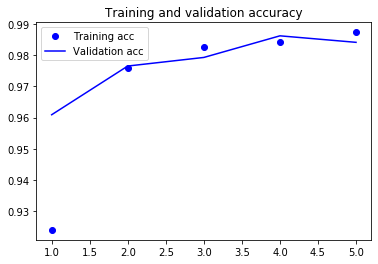

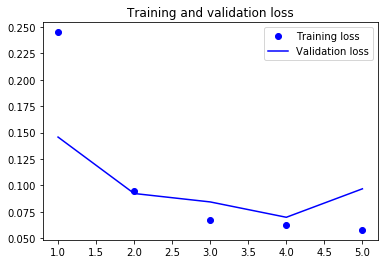

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [67]:
#---------------------------------EXERCISE----------------------------------------

model_ex = models.Sequential()
model_ex.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(128, 128, 3)))
model_ex.add(layers.MaxPooling2D((2, 2)))
model_ex.add(layers.Conv2D(64, (3, 3), activation='elu',))
model_ex.add(layers.MaxPooling2D((2, 2)))
model_ex.add(layers.Conv2D(128, (3, 3), activation='elu'))
#model_ex.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dense(10, activation='softmax'))
model_ex.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 28, 28, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(optimizer='adadelta', 
              loss='mean_squared_error',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 56s 1ms/step - loss: 0.0900 - acc: 0.1140 - val_loss: 0.0900 - val_acc: 0.1060
Epoch 2/5
48000/48000 [==============================] - 54s 1ms/step - loss: 0.0900 - acc: 0.1140 - val_loss: 0.0900 - val_acc: 0.1060
Epoch 3/5
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0900 - acc: 0.1140 - val_loss: 0.0900 - val_acc: 0.1060
Epoch 4/5
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0900 - acc: 0.1140 - val_loss: 0.0900 - val_acc: 0.1060
Epoch 5/5
48000/48000 [==============================] - 55s 1ms/step - loss: 0.0900 - acc: 0.1140 - val_loss: 0.0900 - val_acc: 0.1060


In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 5s 484us/step


0.1135

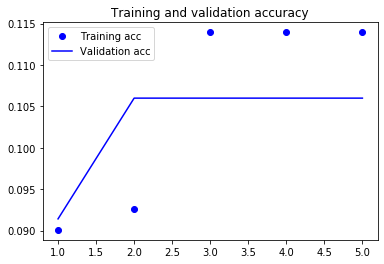

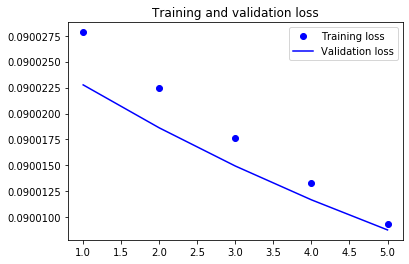

In [71]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
